# Perceptron Implementation

In this notebook, we will be implementing the perceptron algorithm and testing it on the diabetes dataset. 

As seen in the below picture, the perceptron is a single neuron that takes in multiple features as inputs and eventually decide to activate or not activate. The algorithm will either return a +1 or -1, if the final prediction passes a certain cutoff. 

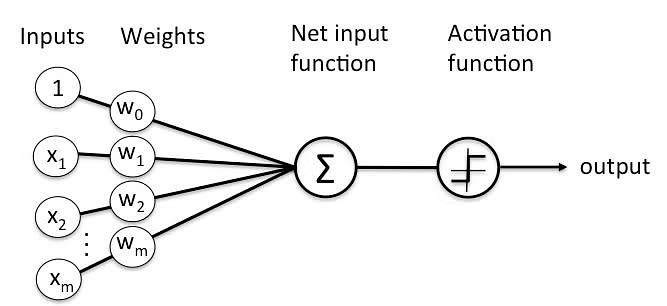


Pre-Activation Function: $z = w_1 x_1 + w_2 x_2 + ... w_m x_m + w_0$

Post-Activation Function: $a = \phi (z)$

Activation Function: $a$ = $1$ if $z > 0$, $-1$ if $z < 0$

First, we will load in the dataset. We will be predicting whether a patient has diabetes or not. For the sake of showing the importance of linearly separable data, we will only choose two features: Insulin Levels and BMI. 

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

auto = pd.read_csv("/Users/kritinshanmugam/Downloads/auto-mpg.csv")
auto = auto[auto['horsepower'] != '?']

X = auto.drop(['car name', 'mpg'], axis=1)
X = X.astype('float64')

X = (X - X.mean())/X.std()
X = X[['horsepower', 'weight']].astype('float64')
y = auto['mpg'].astype('float64')

y = np.where(auto['mpg'] < 23, -1, 1)

X = X.values


Now, we can actually implement our perceptron algorithm through a python class. This class will hold a scaling value, epochs, weights (including bias), and training errors. It will also include methods for training, inputting data, and making predictions.

In [36]:
class Perceptron(object):
    def __init__(self, eta = .5, epochs=50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Now, we can create an instance of the Perceptron and try it on our dataset. 

In [37]:

# Create instance of Perceptron class with 10k epochs
Percept = Perceptron(eta=0.2, epochs = 10_000)

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
# Train the Perceptron on the training dataset
Percept.train(x_train, y_train)

# Obtain the predictions
y_predictions = Percept.predict(x_test)

booleans = ((y_test == y_predictions))

print("Number of false predictions: ", np.sum(booleans == False))


Number of false predictions:  18


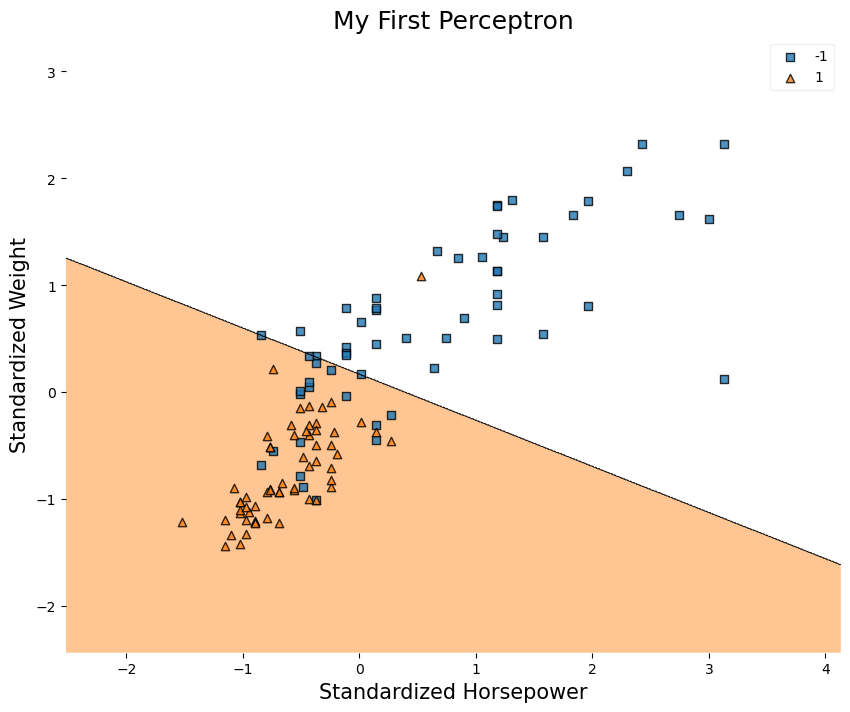

In [38]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(x_test, y_test, clf = Percept)
plt.title("My First Perceptron", fontsize = 18)
plt.xlabel("Standardized Horsepower", fontsize = 15)
plt.ylabel("Standardized Weight", fontsize = 15)
plt.show()

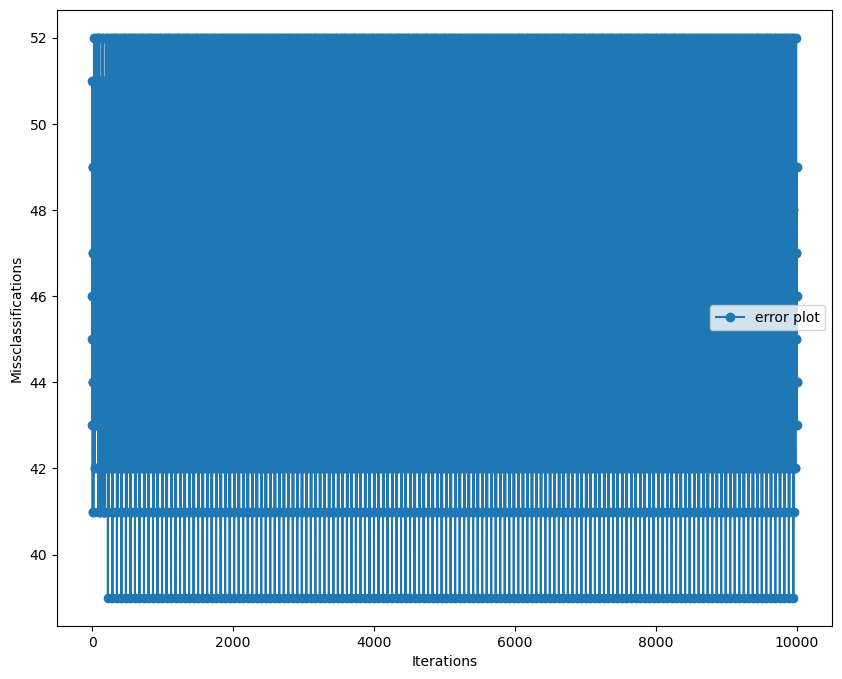

In [39]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(Percept.errors_)+1), Percept.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()